In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from scipy import stats
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
columns =['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self-Employed', 'Applicant Income', 'Co-Applicant Income',
        'Loan Amount', 'Loan_Amount_term', 'Credit History', 'Property Area', 'Loan_Status']
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv',
               names =columns, header =None)
df =df.sample(frac =1)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self-Employed,Applicant Income,Co-Applicant Income,Loan Amount,Loan_Amount_term,Credit History,Property Area,Loan_Status
184,LP001639,Female,Yes,0,Graduate,No,3625,0.0,108.0,360.0,1.0,Semiurban,Y
531,LP002720,Male,Yes,3+,Graduate,No,4281,0.0,100.0,360.0,1.0,Urban,Y
239,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
55,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,Y
302,LP001974,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
539,LP002740,Male,Yes,3+,Graduate,No,6417,0.0,157.0,180.0,1.0,Rural,Y
214,LP001716,Male,Yes,0,Graduate,No,3173,3021.0,137.0,360.0,1.0,Urban,Y
359,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,Y
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y


In [3]:
print("No. of Duplicate records are :", df.duplicated().sum())

No. of Duplicate records are : 0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 184 to 107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               601 non-null    object 
 2   Married              611 non-null    object 
 3   Dependents           599 non-null    object 
 4   Education            614 non-null    object 
 5   Self-Employed        582 non-null    object 
 6   Applicant Income     614 non-null    int64  
 7   Co-Applicant Income  614 non-null    float64
 8   Loan Amount          592 non-null    float64
 9   Loan_Amount_term     600 non-null    float64
 10  Credit History       564 non-null    float64
 11  Property Area        614 non-null    object 
 12  Loan_Status          614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [5]:
df.shape

(614, 13)

In [6]:
# Checking count of each column
for i in df:
    print(df[i].value_counts())

Loan_ID
LP001639    1
LP002622    1
LP001586    1
LP002288    1
LP002332    1
           ..
LP001658    1
LP002788    1
LP001225    1
LP002024    1
LP001370    1
Name: count, Length: 614, dtype: int64
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self-Employed
No     500
Yes     82
Name: count, dtype: int64
Applicant Income
2500    9
2600    6
4583    6
6000    6
4166    5
       ..
4191    1
4843    1
2473    1
5726    1
7085    1
Name: count, Length: 505, dtype: int64
Co-Applicant Income
0.0       273
2083.0      5
1666.0      5
2500.0      5
1800.0      3
         ... 
1881.0      1
6666.0      1
5624.0      1
3428.0      1
2934.0      1
Name: count, Length: 287, dtype: int64
Loan Amount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
496.

In [7]:
# Checking null values
df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self-Employed          32
Applicant Income        0
Co-Applicant Income     0
Loan Amount            22
Loan_Amount_term       14
Credit History         50
Property Area           0
Loan_Status             0
dtype: int64

In [8]:
# We will delete records where loan amount is null
df.dropna(subset =['Loan Amount'], inplace =True)

In [9]:
df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 2
Dependents             13
Education               0
Self-Employed          31
Applicant Income        0
Co-Applicant Income     0
Loan Amount             0
Loan_Amount_term       14
Credit History         49
Property Area           0
Loan_Status             0
dtype: int64

In [10]:
# We will delete records where credit history is null
df.dropna(subset =['Credit History'], inplace =True)

In [11]:
df.isnull().sum()

Loan_ID                 0
Gender                 12
Married                 2
Dependents             13
Education               0
Self-Employed          26
Applicant Income        0
Co-Applicant Income     0
Loan Amount             0
Loan_Amount_term       14
Credit History          0
Property Area           0
Loan_Status             0
dtype: int64

In [12]:
df.shape

(543, 13)

In [13]:
df['Gender'] =df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] =df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self-Employed'] =df['Self-Employed'].fillna(df['Self-Employed'].mode()[0])
df['Loan_Amount_term'] =df['Loan_Amount_term'].fillna(df['Loan_Amount_term'].mode()[0])
df['Loan_Amount_term'] =df['Loan_Amount_term'].fillna(df['Loan_Amount_term'].mode()[0])
df['Married'] =df['Married'].fillna(df['Married'].mode()[0])

In [14]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self-Employed          0
Applicant Income       0
Co-Applicant Income    0
Loan Amount            0
Loan_Amount_term       0
Credit History         0
Property Area          0
Loan_Status            0
dtype: int64

In [15]:
df.shape

(543, 13)

In [16]:
df.reset_index(inplace =True, drop =True)

__All null values fill with mode method.__

In [17]:
# Seperating Numerical and categorical data

# Seperating Numerical Columns
num_cols =[]

for i in df.dtypes.index:
    if df[i].dtypes !='object':
        num_cols.append(i)
        
# Seperating Categorical columns
cat_cols =[]

for i in df.dtypes.index:
    if df[i].dtypes =='object':
        cat_cols.append(i)
        
print("Numerical columns are :", num_cols)
print("Categorical columns are :", cat_cols)

Numerical columns are : ['Applicant Income', 'Co-Applicant Income', 'Loan Amount', 'Loan_Amount_term', 'Credit History']
Categorical columns are : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self-Employed', 'Property Area', 'Loan_Status']


# Univariate Analysis

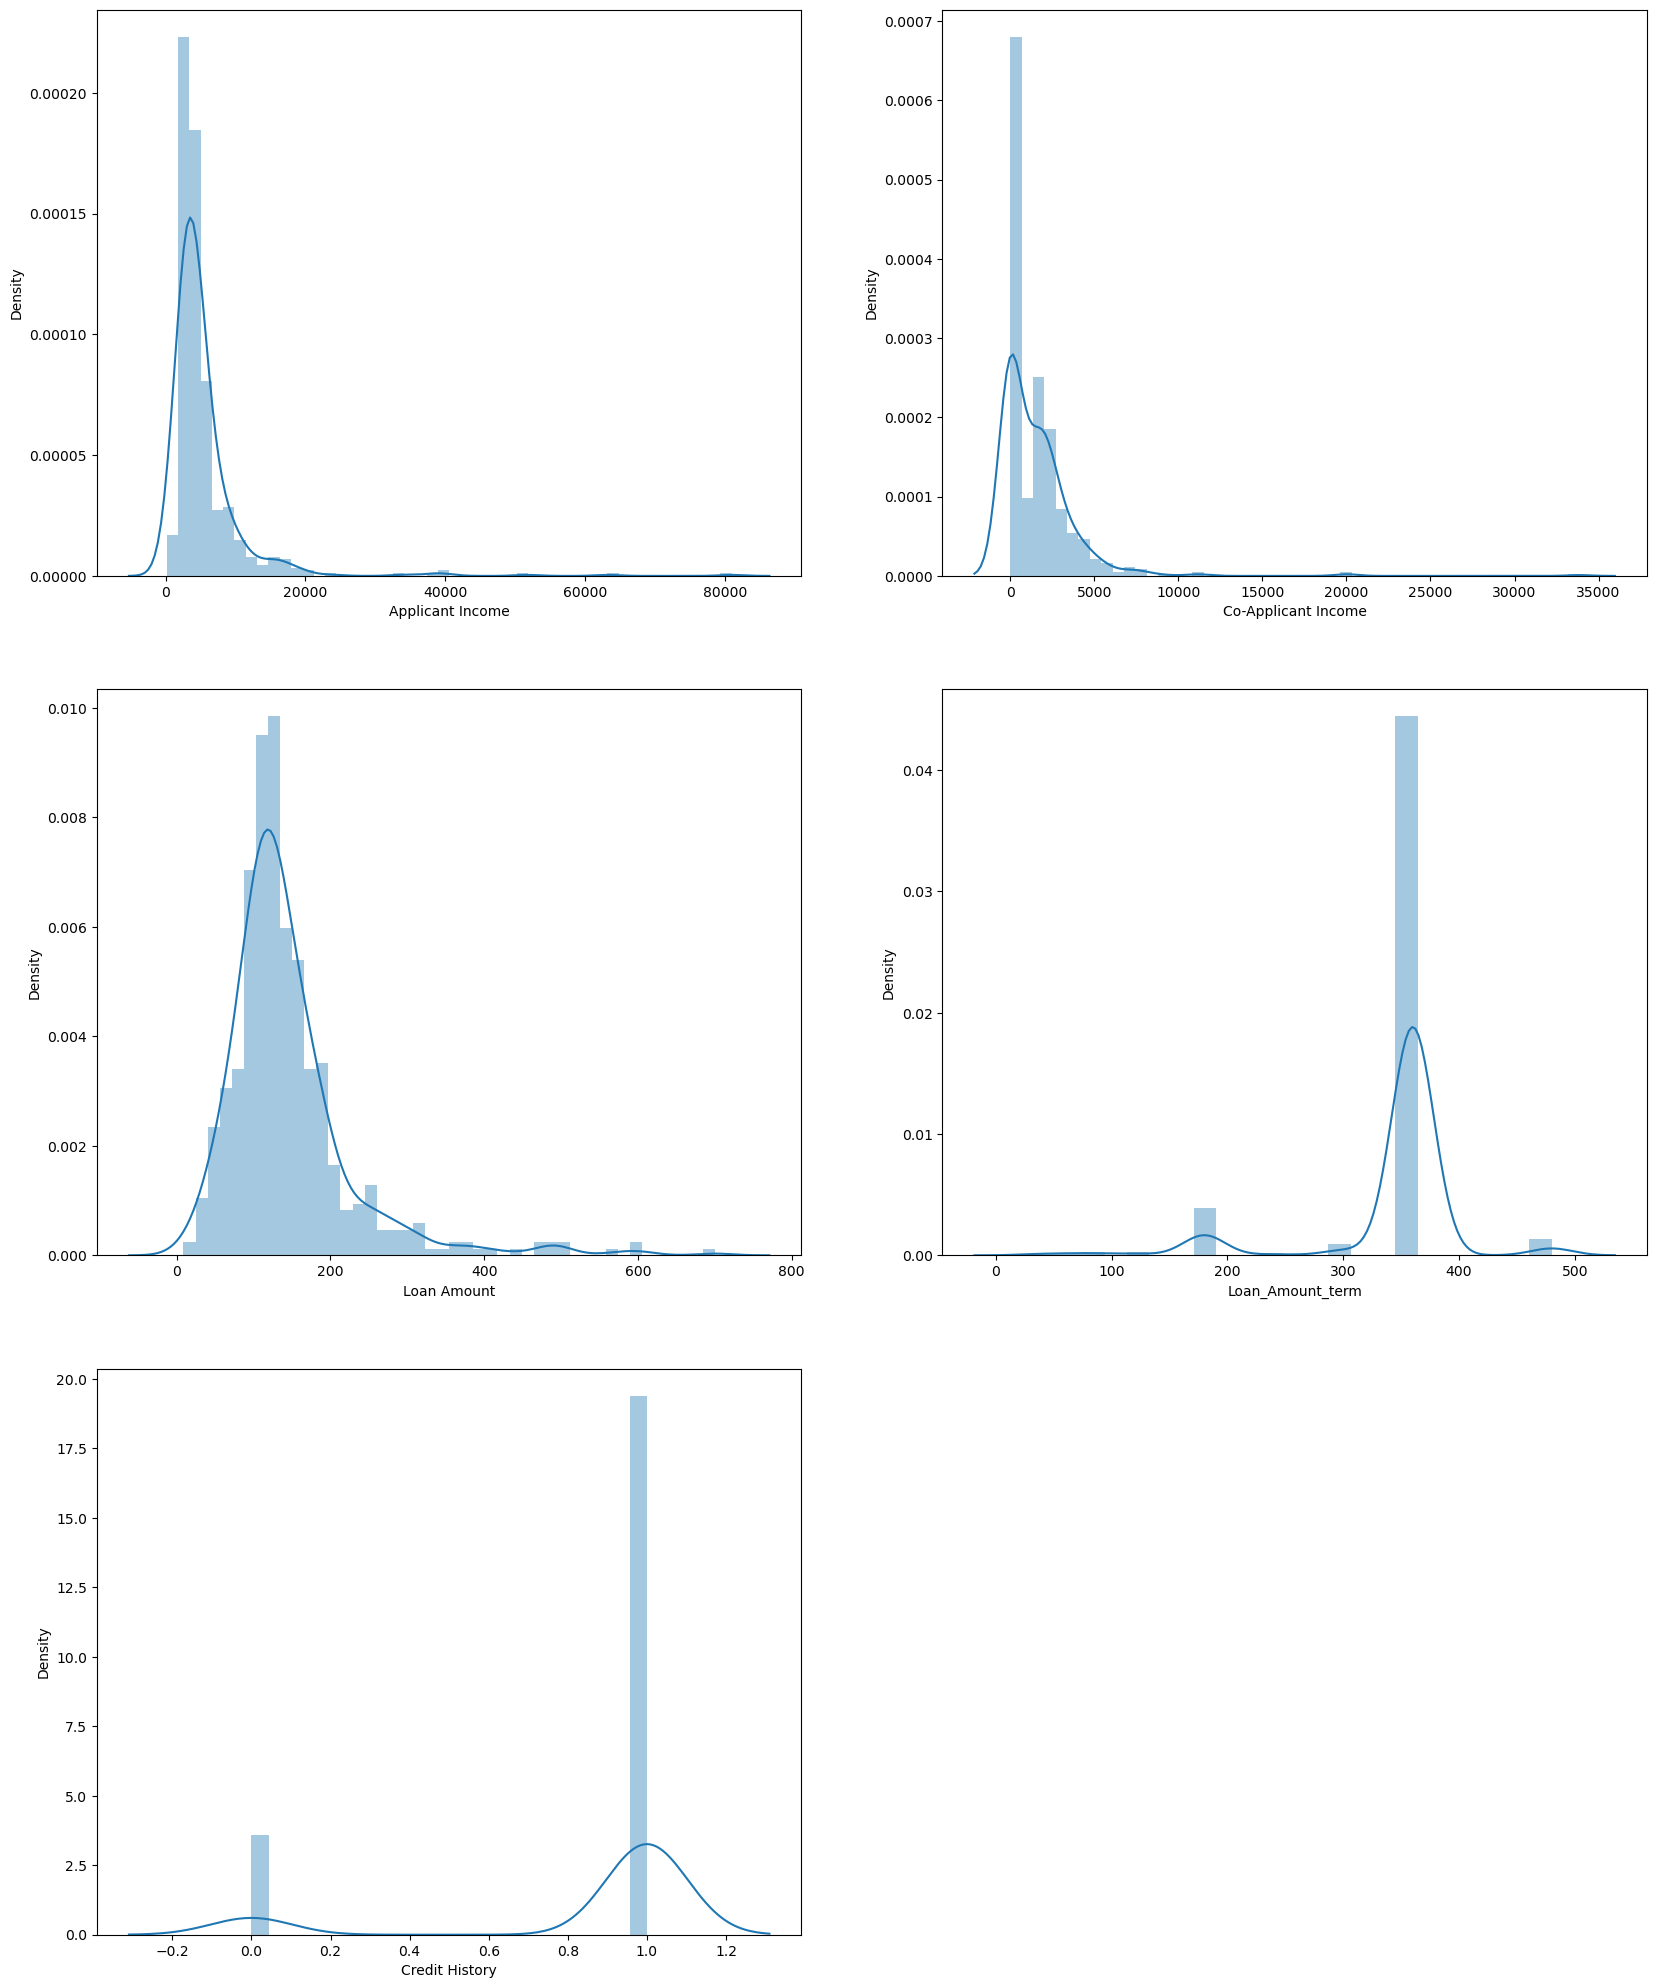

In [18]:
# Checking data distribution for numerical columns

plt.figure(figsize =(20,25))
plotnumber =1

for i in num_cols:
    if plotnumber <=5:
        plt.subplot(3, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()
    

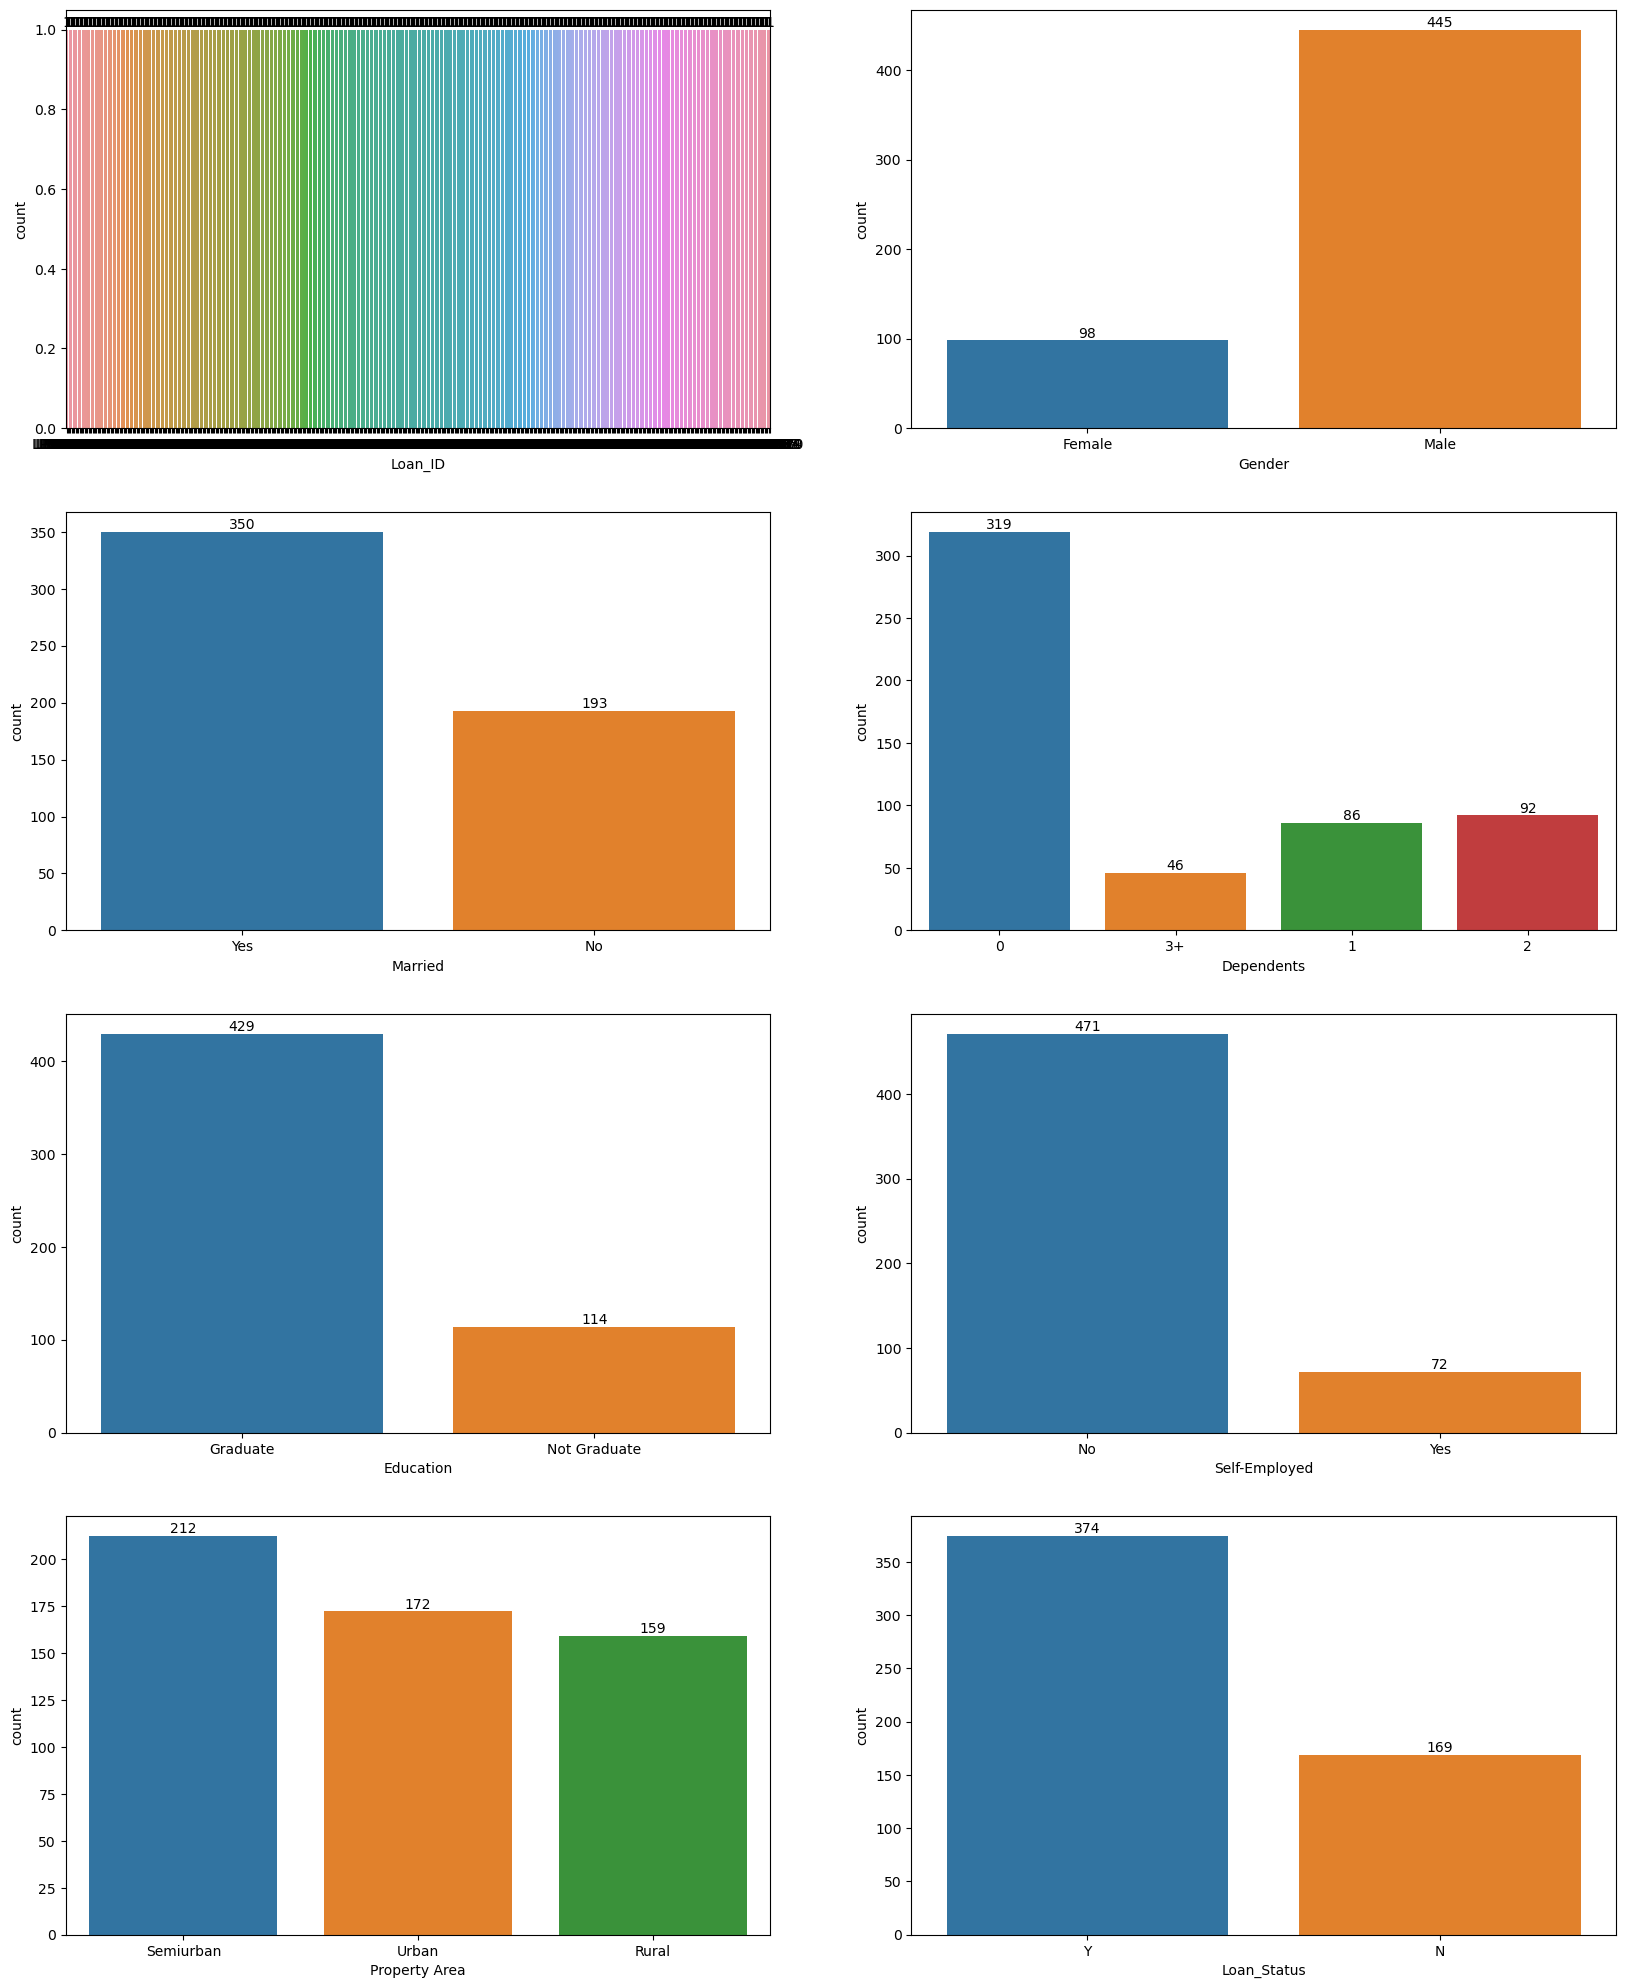

In [19]:
# Checking data distribution of categorical columns

plt.figure(figsize =(20, 25))
plotnumber =1

for i in cat_cols:
    if plotnumber <=8:
        plt.subplot(4, 2, plotnumber)
        ax =sns.countplot(x =i, data =df)
        ax.bar_label(ax.containers[0])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

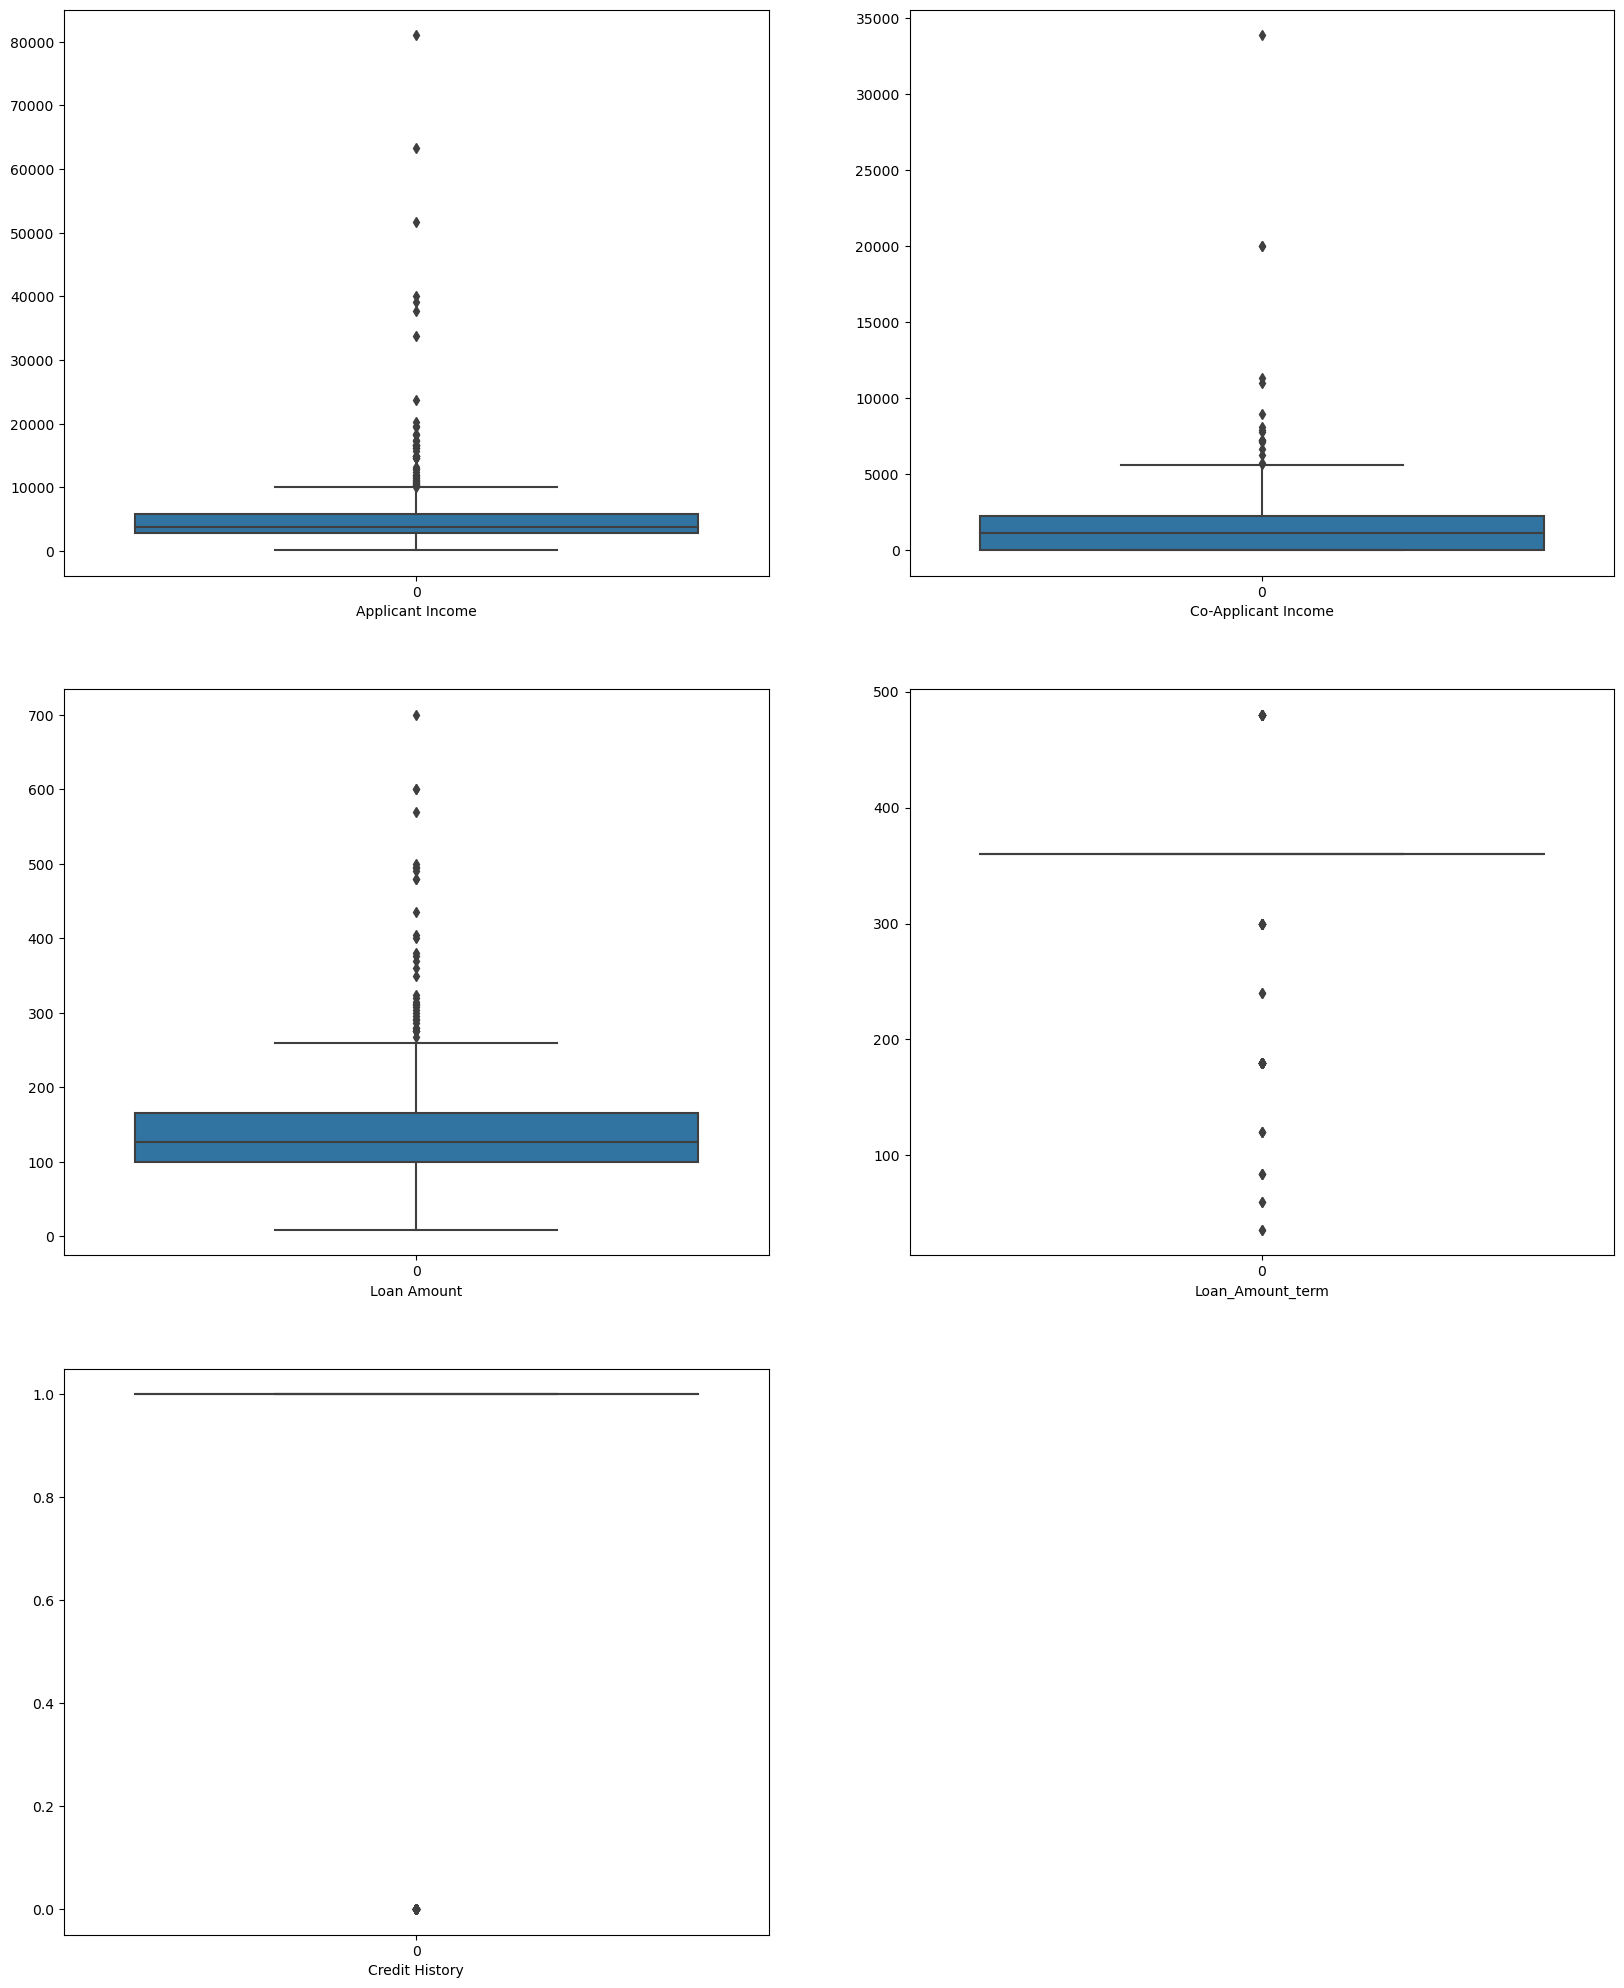

In [20]:
# Plotting boxplot to check outliers
plt.figure(figsize =(20,25))
plotnumber =1

for i in num_cols:
    if plotnumber <=5:
        plt.subplot(3, 2, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [21]:
# Removing outliers using zscore
df_zscore =df[['Applicant Income', 'Co-Applicant Income', 'Loan Amount', 'Loan_Amount_term', 'Credit History']]
z =np.abs(zscore(df_zscore))
print(df_zscore.shape)
df_zscore =df[(z < 3).all(axis =1)]
print(df_zscore.shape)

(543, 5)
(512, 13)


In [22]:
# Computing data loss after using zscore
print("Original shape of dataset :", df.shape[0])
print("Shape of dataset after removing outliers :",df_zscore.shape[0])
print("Data Loss :", ((df.shape[0] - df_zscore.shape[0])/df.shape[0])*100)

Original shape of dataset : 543
Shape of dataset after removing outliers : 512
Data Loss : 5.70902394106814


__There is 5.7% of data loss after removing outliers. We can go head with zscore.__

In [23]:
# Removing outliers using zscore
df_zscore =df[['Applicant Income', 'Co-Applicant Income', 'Loan Amount', 'Loan_Amount_term', 'Credit History']]
z =np.abs(zscore(df_zscore))
df =df[(z < 3).all(axis =1)]
print(df.shape)

(512, 13)


In [24]:
# Checking skewness in the dataset
df[num_cols].skew()

Applicant Income       2.258760
Co-Applicant Income    1.367815
Loan Amount            1.173656
Loan_Amount_term      -2.016524
Credit History        -1.858717
dtype: float64

In [25]:
# Removing skewness

df['Applicant Income'], _ = stats.boxcox(df['Applicant Income'])
df['Co-Applicant Income'], _ = stats.yeojohnson(df['Co-Applicant Income'])
df['Loan Amount'], _ = stats.yeojohnson(df['Loan Amount'])
df['Loan_Amount_term'], _ = stats.yeojohnson(df['Loan_Amount_term'])
df['Credit History'], _ = stats.yeojohnson(df['Credit History'])

In [26]:
# Checking skewness in the dataset
df[num_cols].skew()

Applicant Income       0.034088
Co-Applicant Income   -0.182423
Loan Amount            0.047167
Loan_Amount_term       0.672149
Credit History        -1.858717
dtype: float64

In [27]:
# Encoding categorical columns using OrdinalEncoding
OE =OrdinalEncoder()
for i in df:
    if df[i].dtypes =='object':
        df[i] =OE.fit_transform(df[i].values.reshape(-1, 1))
        
df

,Loan_ID,Gender,Married,Dependents,Education,Self-Employed,Applicant Income,Co-Applicant Income,Loan Amount,Loan_Amount_term,Credit History,Property Area,Loan_Status
0,153.0,0.0,1.0,0.0,0.0,0.0,10.788278,0.000000,10.903393,1.105876e+07,53.278799,1.0,1.0
1,444.0,1.0,1.0,3.0,0.0,0.0,11.071434,0.000000,10.565192,1.105876e+07,53.278799,2.0,1.0
2,201.0,1.0,1.0,1.0,0.0,0.0,10.637339,0.000000,10.389226,1.105876e+07,53.278799,1.0,1.0
3,47.0,1.0,1.0,2.0,0.0,0.0,10.299045,9.250421,10.433673,1.105876e+07,53.278799,1.0,1.0
4,257.0,0.0,0.0,0.0,0.0,0.0,11.338472,0.000000,11.826215,1.105876e+07,53.278799,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,65.0,1.0,0.0,0.0,0.0,0.0,10.845745,0.000000,11.106274,2.569088e+07,53.278799,2.0,0.0
539,381.0,1.0,0.0,0.0,0.0,1.0,11.947769,0.000000,9.829784,1.105876e+07,53.278799,1.0,1.0
540,255.0,1.0,1.0,0.0,1.0,0.0,9.629143,10.849488,10.253986,1.105876e+07,0.000000,2.0,0.0
541,123.0,0.0,0.0,0.0,0.0,0.0,12.563750,9.855021,14.592114,1.105876e+07,53.278799,0.0,0.0


In [28]:
df['Loan_Status']=df['Loan_Status'].astype(int)

In [29]:
df.dtypes

Loan_ID                float64
Gender                 float64
Married                float64
Dependents             float64
Education              float64
Self-Employed          float64
Applicant Income       float64
Co-Applicant Income    float64
Loan Amount            float64
Loan_Amount_term       float64
Credit History         float64
Property Area          float64
Loan_Status              int32
dtype: object

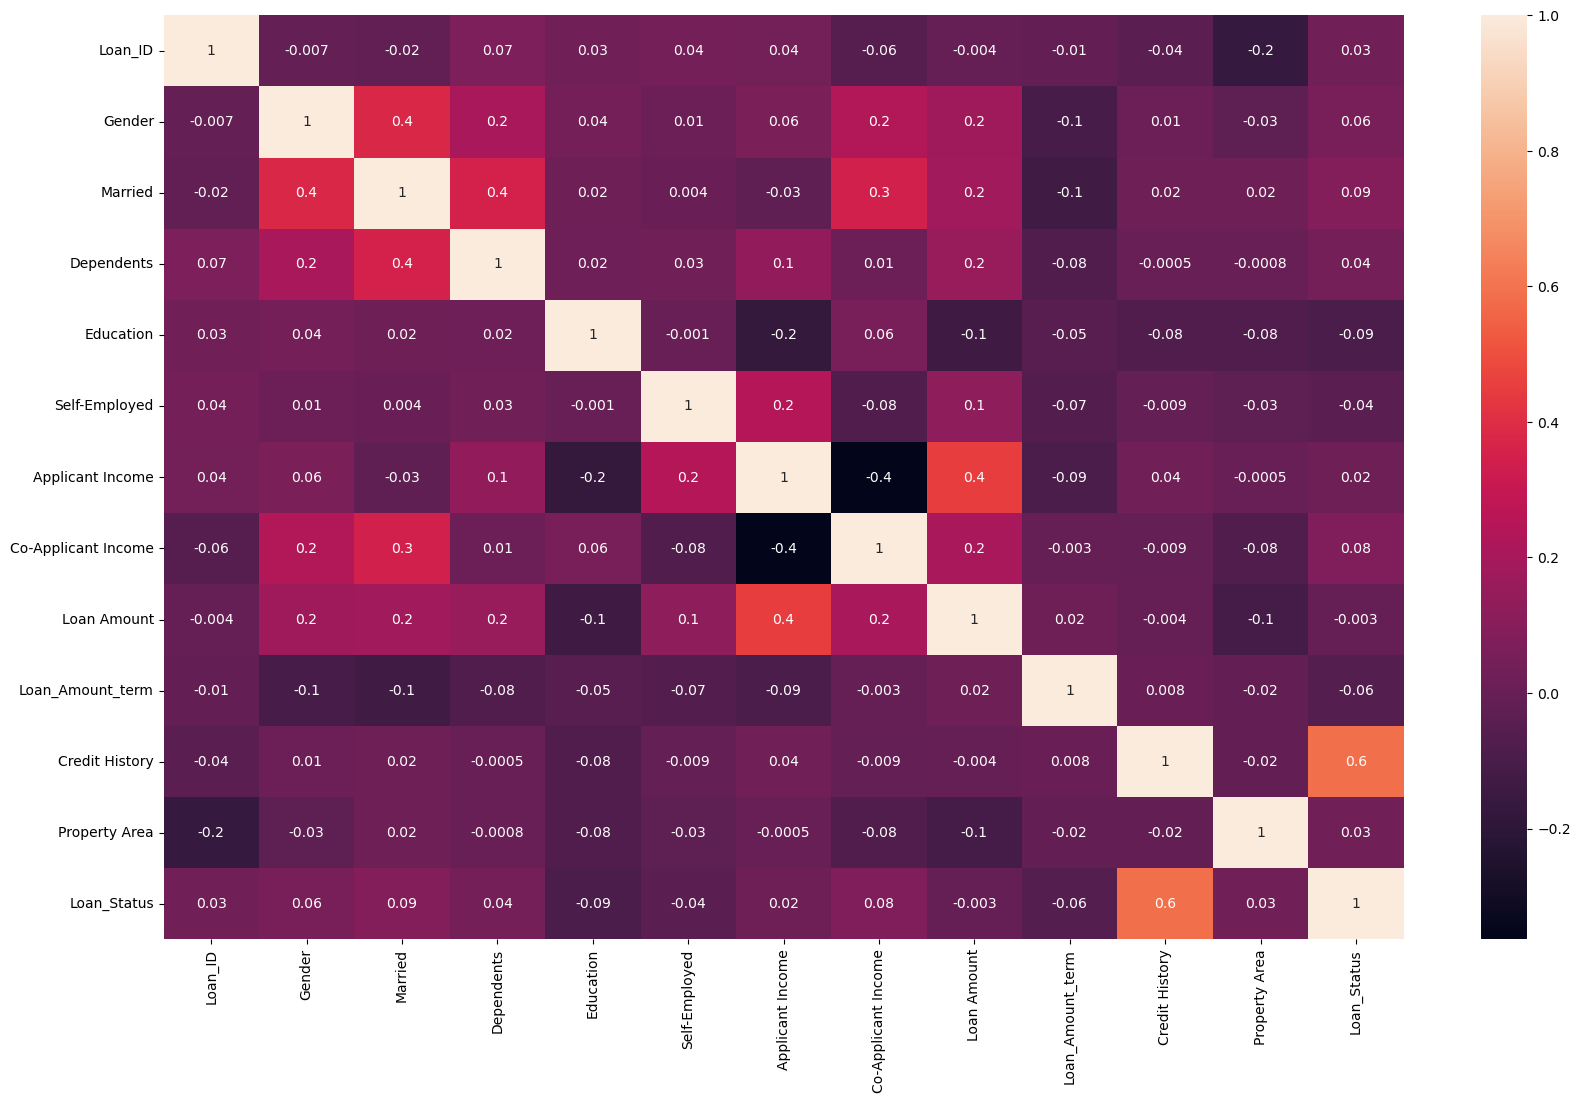

In [30]:
# Plotting heatmap
plt.figure(figsize =(20, 12))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

__No multicollinearity found as per heat map.__

In [31]:
# Seperating features and label
x =df.drop(columns =['Loan_Status'])
y =df[['Loan_Status']]

In [32]:
# Data Standardization
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self-Employed,Applicant Income,Co-Applicant Income,Loan Amount,Loan_Amount_term,Credit History,Property Area
0,-0.693498,-2.108746,0.748983,-0.724268,-0.526125,-0.381332,-0.205459,-1.116488,-0.386435,0.121229,0.436689,-0.024869
1,1.275360,0.474216,0.748983,2.250265,-0.526125,-0.381332,0.090366,-1.116488,-0.555453,0.121229,0.436689,1.248416
2,-0.368738,0.474216,0.748983,0.267243,-0.526125,-0.381332,-0.363151,-1.116488,-0.643393,0.121229,0.436689,-0.024869
3,-1.410677,0.474216,0.748983,1.258754,-0.526125,-0.381332,-0.716581,0.670819,-0.621180,0.121229,0.436689,-0.024869
4,0.010149,-2.108746,-1.335144,-0.724268,-0.526125,-0.381332,0.369351,-1.116488,0.074751,0.121229,0.436689,-1.298154
...,...,...,...,...,...,...,...,...,...,...,...,...
507,-1.288892,0.474216,-1.335144,-0.724268,-0.526125,-0.381332,-0.145421,-1.116488,-0.285043,4.136138,0.436689,1.248416
508,0.849112,0.474216,-1.335144,-0.724268,-0.526125,2.622389,1.005909,-1.116488,-0.922977,0.121229,0.436689,-0.024869
509,-0.003383,0.474216,0.748983,-0.724268,1.900687,-0.381332,-1.416456,0.979780,-0.710980,0.121229,-2.289957,1.248416
510,-0.896473,-2.108746,-1.335144,-0.724268,-0.526125,-0.381332,1.649451,0.787635,1.457027,0.121229,0.436689,-1.298154


In [33]:
y.reset_index(inplace =True, drop =True)

In [34]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self-Employed          0
Applicant Income       0
Co-Applicant Income    0
Loan Amount            0
Loan_Amount_term       0
Credit History         0
Property Area          0
Loan_Status            0
dtype: int64

In [35]:
# Checking variance inflation factor
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feature'] =x.columns
vif

,VIF Values,Feature
0,1.044903,Loan_ID
1,1.226330,Gender
2,1.451716,Married
3,1.197854,Dependents
4,1.063157,Education
5,1.068913,Self-Employed
6,1.845786,Applicant Income
7,1.622709,Co-Applicant Income
8,1.609383,Loan Amount
9,1.047987,Loan_Amount_term


# EDA Completed

## Model Building

### Finding best random state

In [36]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    
    RFC =RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred =RFC.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    if acc> maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :",maxacc, "at random state", maxrs)

Maximum accuracy is : 0.8831168831168831 at random state 113


In [37]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [38]:
# Initializing models
RFC =RandomForestClassifier()
ETC =ExtraTreesClassifier()
svc =SVC()
GBC =GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC =BaggingClassifier()
DTR =DecisionTreeClassifier()
KNN =KNeighborsClassifier()

In [39]:
# Defining Models
models ={'RandomForestClassifier': RFC,
        'ExtraTreesClassifier': ETC,
        'SVC': svc,
        'GradientBoostingClassifier': GBC,
        'AdaBoostClassifier': ABC,
        'BaggingClassifier': BC,
        'DecisionTreeClassifier': DTR,
        'KneighborsClassifier': KNN}


for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    print("Model Name :", name)
    print("*"*20)
    print("Accuracy of the model is :", acc*100)
    print("Confusion Metrix :", confusion_matrix(y_test, pred))
    print("Classification Report :", classification_report(y_test, pred))
    
    print("Cross Validation for the model :", name)
    print("="*80)
    score =cross_val_score(model, x, y, cv =5)
    print(score)
    print(score.mean())
    print("Difference between accuracy score and cross validation is :", (acc-(score.mean()))*100)
    print('\n')
    print("="*80)
    print('\n')

Model Name : RandomForestClassifier
********************
Accuracy of the model is : 85.71428571428571
Confusion Metrix : [[ 31  12]
 [ 10 101]]
Classification Report :               precision    recall  f1-score   support

           0       0.76      0.72      0.74        43
           1       0.89      0.91      0.90       111

    accuracy                           0.86       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.86      0.86      0.86       154

Cross Validation for the model : RandomForestClassifier
[0.73786408 0.81553398 0.83333333 0.85294118 0.84313725]
0.816561964591662
Difference between accuracy score and cross validation is : 4.058089255119512




Model Name : ExtraTreesClassifier
********************
Accuracy of the model is : 81.16883116883116
Confusion Metrix : [[30 13]
 [16 95]]
Classification Report :               precision    recall  f1-score   support

           0       0.65      0.70      0.67        43
           1       0.

__SVC is our best model with accuracy of 88.31% and also the difference between accuracy score and cross validation is 5.3%.__

## Hyperparameter tunning

In [41]:
parameters ={'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']}

In [42]:
GCV =GridSearchCV(SVC(), parameters, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [43]:
GCV.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [53]:
Final_model =SVC(C =10, gamma =0.001, kernel ='rbf')
svc.fit(x_train, y_train)
pred =svc.predict(x_test)
acc =accuracy_score(y_test, pred)
print(acc*100)

89.6103896103896


__Accuracy increased after hyperparameter tunning from 88.31% to 89.61%.__

In [54]:
# Saving model
pickle.dump(Final_model, open('Loan_Application.pkl', 'wb'))

In [58]:
# Loading model
loaded_model =pickle.load(open('Loan_Application.pkl', 'rb'))
loaded_model.fit(x_train, y_train)
pred =loaded_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print('Accuracy of the model is :', acc*100)

Accuracy of the model is : 89.6103896103896


In [60]:
# Comparing Actual vs predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

,Predicted,Actual
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
149,1,1
150,1,0
151,1,0
152,0,0
